# Sleep Disorder Prediction using Ensembel Learning


The aim of the project is to analyze the person's lifestyles and medical variables such as age, BMI, physical activity, sleep duration, blood pressure and many more, to predict the sleep disorder and its type.

### About the Dataset
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Data Dictionary
| Column Name | Description |
| --- | --- |
|Person_ID | Unique ID assigned to each person |
|Gender|The gender of the person (Male/Female)|
|Age | Age of the person in years |
|Occupation | The occupation of the person |
|Sleep_duration | The duration of sleep of the person in hours |
|Quality_of_sleep | A subjective rating of the quality of sleep, ranging from 1 to 10|
|Physical_activity | The level of physical activity of the person (Low/Medium/High) |
|Stress Level| A subjective rating of the stress level, ranging from 1 to 10 |
|BMI_category | The BMI category of the person (Underweight/Normal/Overweight/Obesity) |
|Blood_pressure | The blood pressure of the person in mmHg |
|Heart_rate | The heart rate of the person in beats per minute |
|Daily Steps | The number of steps taken by the person per day |
|Sleep_disorder | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea) |


### Details about Sleep Disorder Column:
- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data Preprocessing Part 1

In [3]:
#checking for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
#replacing the null values with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

The nan/None value in sleep disorder stands for no sleep disorder, so it is not a missing value.

In [5]:
#drop column Person ID
df.drop('Person ID', axis=1, inplace=True)

In [6]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print("             {}                  ".format(col))
    print(df[col].value_counts())
    print()

Unique values in each column are:
             Gender                  
Gender
Male      189
Female    185
Name: count, dtype: int64

             Age                  
Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: count, dtype: int64

             Occupation                  
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

             Sleep Duration                  
Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1

#### Splitting the blood pressure into systolic and diastolic

In [7]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [8]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Checking the unique values from each categorical column

In [ ]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

## Explorative Data Analysis

The EDA is divided into two phases:

Phase 1:  Understanding the data by plotting its variables

Phase 2: Understanding the correlation between the variables

#### Phase 1

<Axes: xlabel='Sleep Disorder', ylabel='count'>

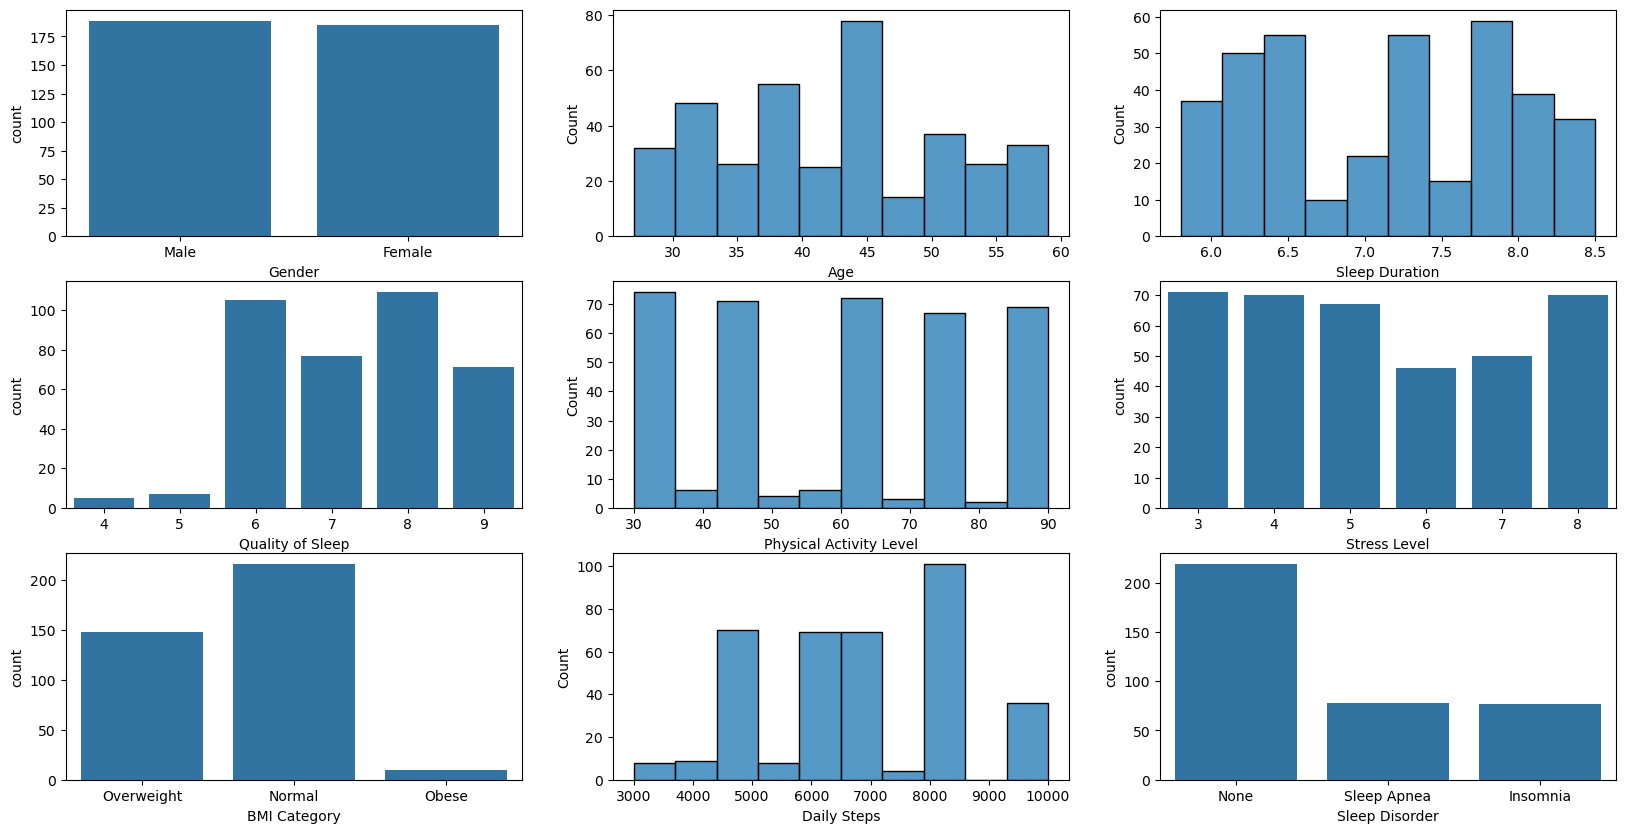

In [10]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])


The number of males and females is almost equal, out of which majority of the people have age between 30-45 years. Most of the people have sleep quality greater than 5 which means there are getting sufficient sleep. Moreover, most of the people have normal BMI whci directly relates with the distribution of sleep disorder which shows equal number of people with and without sleep disorder.

#### Phase 2

#### Gender and Sleep Disorder

Text(0.5, 1.0, 'Gender and Sleep Disorder')

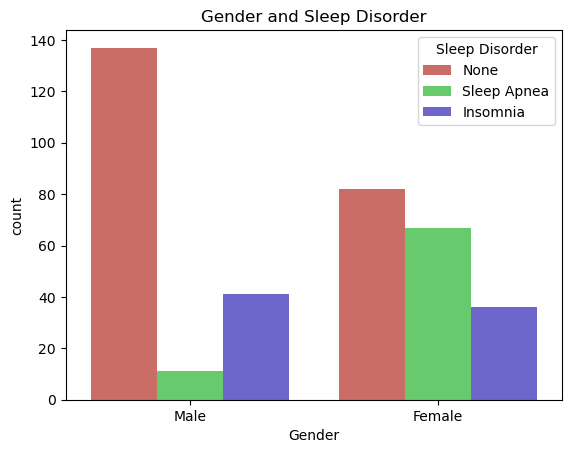

In [11]:
#Gender count plot
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

Most of the males and females are not suffering from any sleep disorder. However females tend to have more sleep disorder as compared to males. The number of females suffering from Sleep Apnea is quite high as compared to males. But in contrast to that, greater number of males are suffering from Insomia as compared to females.

### Effect of Occupation on Sleep Disorder

C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\2508509850.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


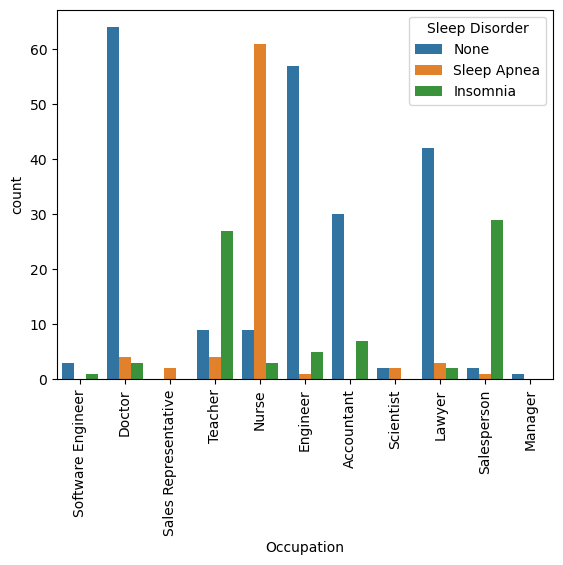

In [12]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

From the graph it is clear that the occupation has huge impact on the sleep disorder. Nurses are more subjected to have Sleep Apenea as compared to other occupations and very few of them have no sleep disorder. After nurses, the next most affected occupation is the Salesperson, which counts for the  most suffering from Insomia followed by teachers. However there are some occupations where most of the people have very few instance of Sleep Apenea and Insomia such as Engineers, Doctors, Accountants, Lawyers. 
The Software ENgineers and Managers are so less in number so I cannot say much about that, But the occupation Sales Representative has shown only Sleep Apenea and no Insomia or No sleep disorder. 

### BMI and Sleep Disorder

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

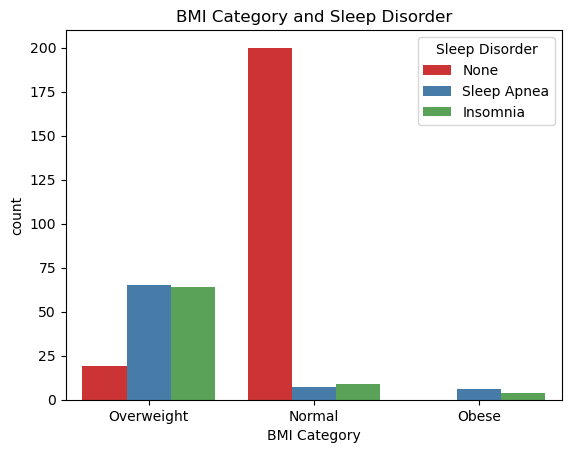

In [13]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

People with normal BMI are less likely to suffer from any sleep disorder. However, this is opposite in case of Overweight and Obese people. Overweight are more likely to suffer more from sleep disordera than Obese people.

## Data Preprocessing Part 2

#### Label Encoding for categorical variables

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [15]:
vars1 = ['Gender', 'Occupation','BMI Category','Sleep Disorder']

for i in vars1:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


## Correlation Matrix Heatmap

<Axes: >

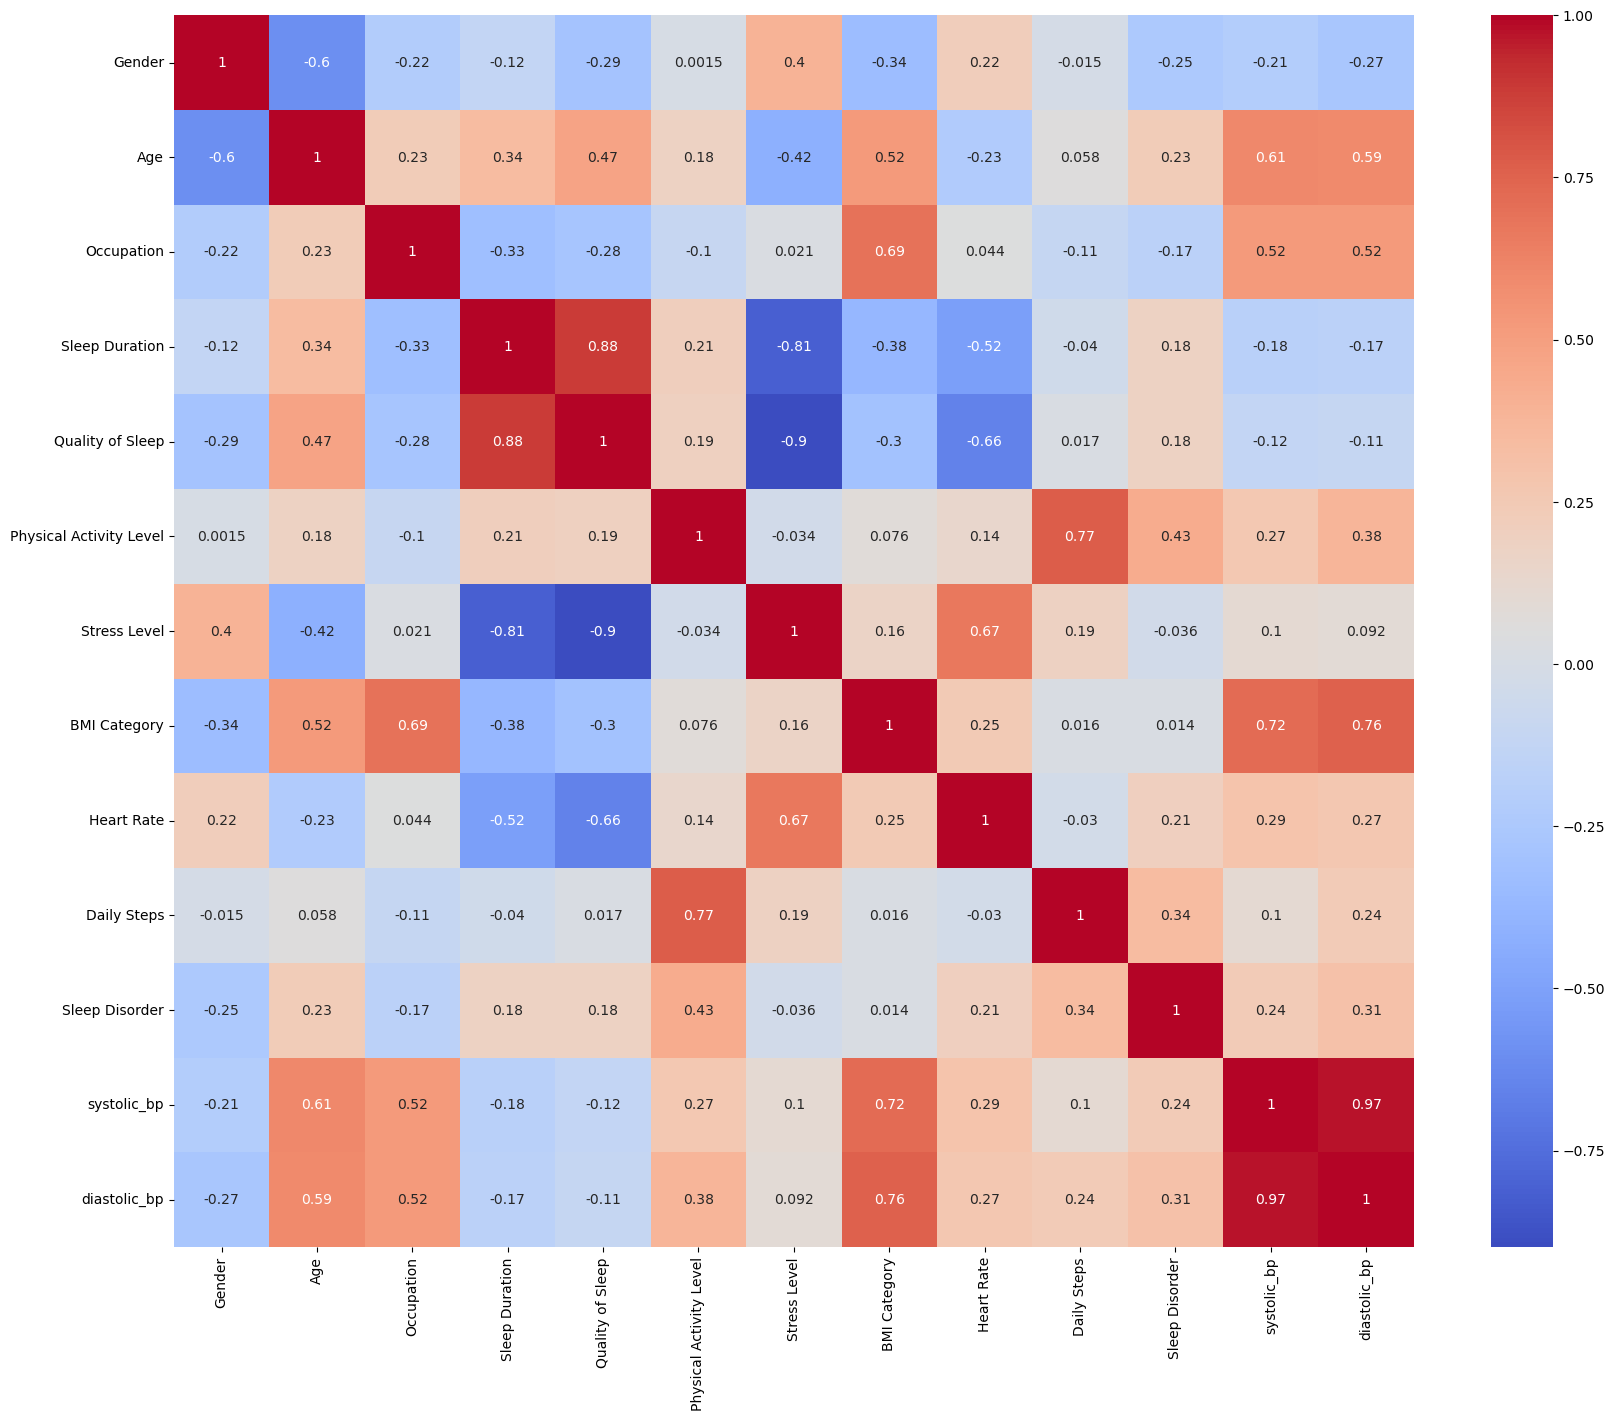

In [16]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1), df['Sleep Disorder'], 
                                                    test_size=0.3, random_state=42)

In [18]:
X_train.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
19,1,30,1,7.6,7,75,6,0,70,8000,120,80
357,0,58,5,8.0,9,75,3,2,68,7000,140,95
79,1,33,1,6.0,6,30,8,0,72,5000,125,80
167,1,41,3,7.1,7,55,6,2,72,6000,125,82
18,0,29,5,6.5,5,40,7,0,80,4000,132,87


## Data Normalization

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

## Model Building

For predictiong the sleep disorder thriugh classification algorithms I will use the following algorithms:

- Tree Based Approch
    1. Decision Tree Classifier
    
- Bagging Approch 
    2. Random Forest Classifier
    3. Bagging Classifier
    
- Boosting Approch
    4. Addboost with Decison Tree
    5. Gradient Boosting 


- Fine tuning using GridSearchCV

- Ensembel Voting Classifier


In [20]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### 1. Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.91      0.95      0.93        62
           2       0.90      0.70      0.79        27

    accuracy                           0.87       113
   macro avg       0.85      0.83      0.84       113
weighted avg       0.87      0.87      0.87       113

Accuracy:  0.8672566371681416


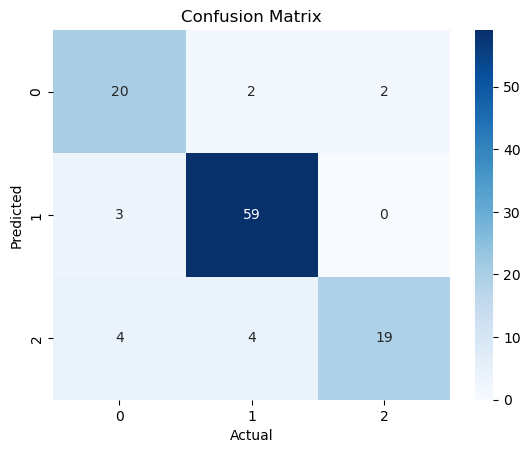

In [21]:
# create model object
dtree = DecisionTreeClassifier()

# Training the model with train dataset
dtree.fit(X_train_scale, y_train)

# prediction on test data
d_pred = dtree.predict(X_test_scale)


print(classification_report(y_test, d_pred))
print("Accuracy: ", accuracy_score(y_test, d_pred))
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The diagonal boxes show the count of true positive results, i.e correct predictions made by the model. The off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model.

The model gives pretty decent results with an accuracy of86% and an average F1 score of 0.84. The model is able to predict the sleep disorder with a good accuracy.

### Dsitribution plot for predicted and actual values

C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\174176785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\174176785.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

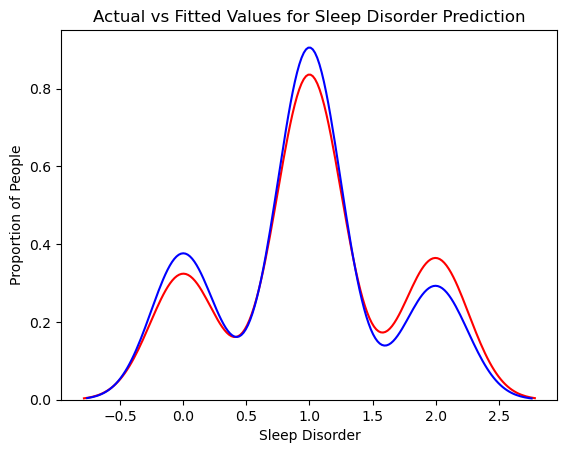

In [22]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

The actual values are represented with red and the predicted ones with blue. As shown in the graph, the model's prediction are able to follow the curve of actual values but the predicted values are still different from actual ones. Therefore the model is not able to predict the values accurately.

## Bagging Approach 

### 2. Random Forest Classifier

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

Accuracy:  0.8938053097345132


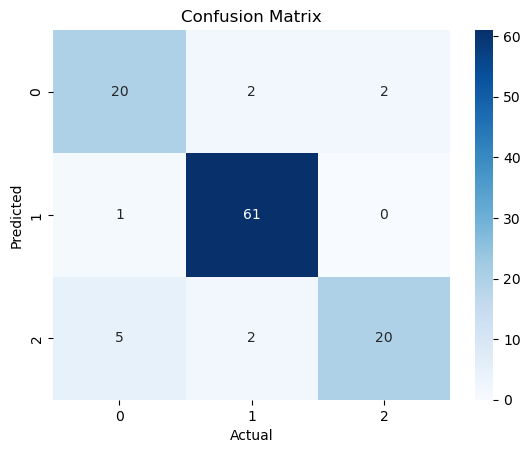

In [23]:
# create model object
rfc = RandomForestClassifier(n_estimators=500, 
                             random_state=10,
                             verbose=1,
                             n_jobs=-1)

# Training the model with train dataset
rfc.fit(X_train_scale, y_train)

# prediction on test data
rfc_pred = rfc.predict(X_test_scale)


print(classification_report(y_test, rfc_pred))
print("Accuracy: ", accuracy_score(y_test, rfc_pred))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The Random Forest Classifier model  has greater accuracy than the Decision Tree Classifier model. The diagonal boxes count for the True Positives i.e correct predictions, whereas the off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model. Since the number of false positve value is less, it shows that the model is good at predicting the correct results.

### Distribution plot for predicted and acutal values

C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\3040452615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\3040452615.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

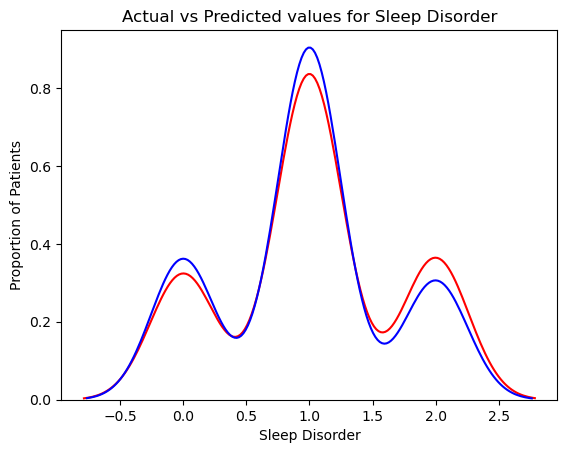

In [24]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

The Random forest classifier has improved accuracy as compared to the Decision Tree which is shown with the gap between the actual and predcited values which was wider incase of Descision Tree Classifier.

The Random Forest Classifier model has an accuracy of 89%  and an avergae F1 score of 0.86. From the metrics it is quite clear that the model is able to predict the sleep disorder quite effectively, with increased accuracy than Decision Tree Classifer.

## 3. Bagging Classifier

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    2.2s remaining:   15.8s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.94      0.98      0.96        62
           2       0.91      0.78      0.84        27

    accuracy                           0.90       113
   macro avg       0.88      0.86      0.87       113
weighted avg       0.90      0.90      0.90       113

Accuracy:  0.9026548672566371


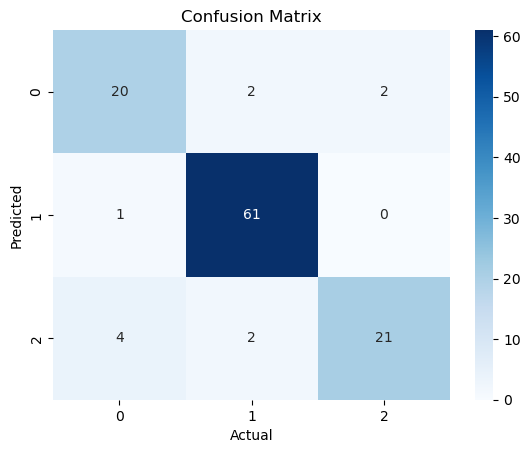

In [25]:
# create model object
bag = BaggingClassifier(n_estimators=200, 
                         random_state=10,
                         verbose=1,
                         n_jobs=-1)

# Training the model with train dataset
bag.fit(X_train_scale, y_train)

# prediction on test data
bag_pred = bag.predict(X_test_scale)


print(classification_report(y_test, bag_pred))
print("Accuracy: ", accuracy_score(y_test, bag_pred))
sns.heatmap(confusion_matrix(y_test, bag_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\3234601587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\3234601587.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

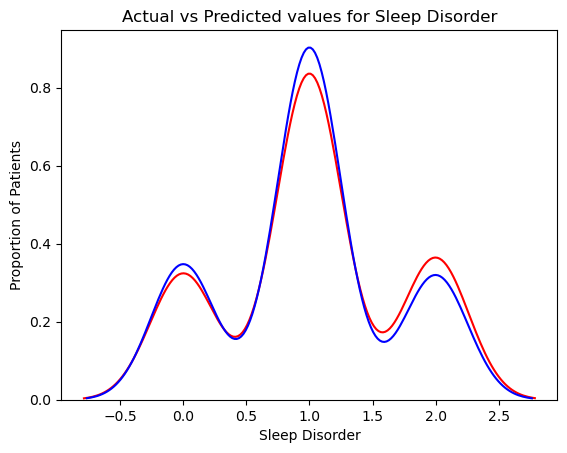

In [26]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(bag_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

## Boosting Clssifiers

### 4. Adaboost Classifers

C:\Users\Dev\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.88      0.95      0.91        62
           2       0.90      0.67      0.77        27

    accuracy                           0.86       113
   macro avg       0.85      0.82      0.83       113
weighted avg       0.86      0.86      0.85       113

Accuracy:  0.8584070796460177


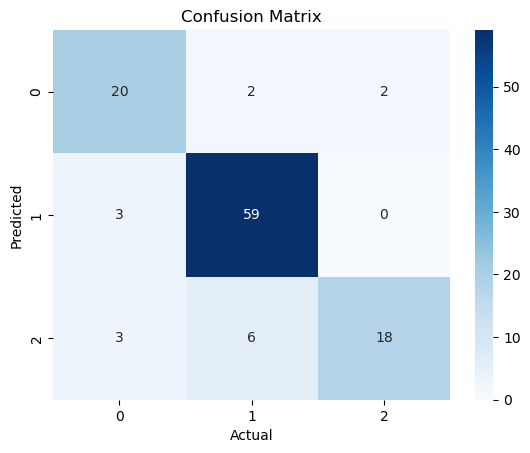

In [27]:
# create model object
AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10), n_estimators=10)

# Training the model with train dataset
AdaBoost.fit(X_train_scale, y_train)

# prediction on test data
ada_pred = AdaBoost.predict(X_test_scale)


print(classification_report(y_test, ada_pred))
print("Accuracy: ", accuracy_score(y_test, ada_pred))
sns.heatmap(confusion_matrix(y_test, ada_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\236237937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\236237937.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

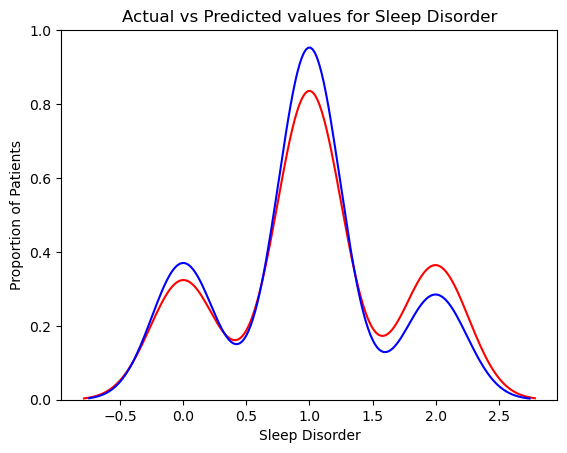

In [28]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(ada_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

### 5. Gradient Boost Classifers

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

Accuracy:  0.8938053097345132


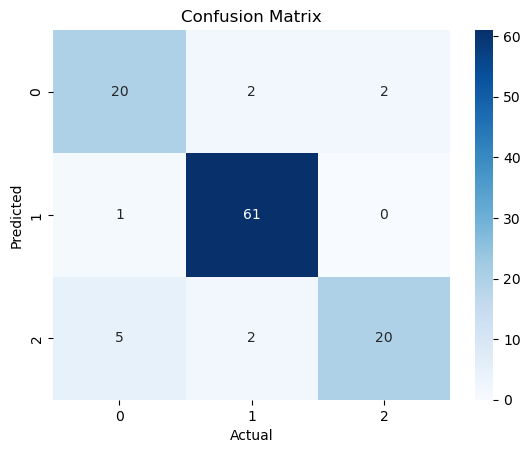

In [29]:
# create model object
grad = GradientBoostingClassifier(n_estimators=150,
                                                     random_state=10)

# Training the model with train dataset
grad.fit(X_train_scale, y_train)

# prediction on test data
grad_pred = grad.predict(X_test_scale)


print(classification_report(y_test, grad_pred))
print("Accuracy: ", accuracy_score(y_test, grad_pred))
sns.heatmap(confusion_matrix(y_test, grad_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\2684567326.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\2684567326.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

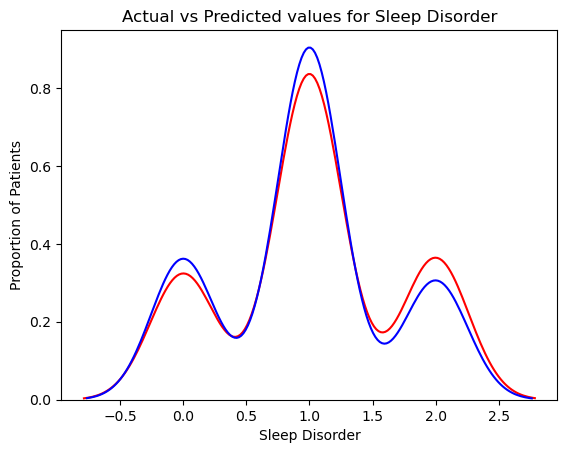

In [30]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(grad_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

## Select best model and get the best paramter using

In [48]:
# Define the parameter grid to search
param_grid = {
    'estimator': [None],  # You can specify the base estimator (e.g., DecisionTreeClassifier, RandomForestClassifier)
    'n_estimators': [200, 300, 400, 500],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 1.0],  # Number of samples to draw from X to train each base estimator
    'max_features': [0.5, 1.0],  # Number of features to draw from X to train each base estimator
    'bootstrap': [True, False],  # Whether samples are drawn with replacement
    'bootstrap_features': [True, False],  # Whether features are drawn with replacement
    'random_state': [42]  # Random seed for reproducibility
}

best_bag = BaggingClassifier()

# Grid search cross-validation
grid_search = GridSearchCV(estimator=best_bag, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scale, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Evaluate the model on the test set using best parameters
best_model = grid_search.best_estimator_
best_y_pred = best_model.predict(X_test_scale)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'bootstrap': True, 'bootstrap_features': True, 'estimator': None, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200, 'random_state': 42}
Best Accuracy Score: 0.9197387518142236


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

Accuracy:  0.8938053097345132


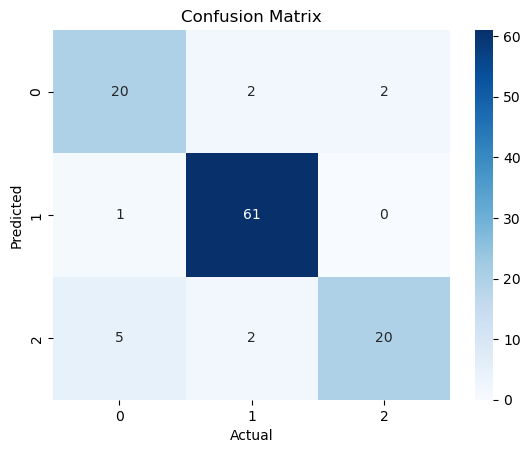

In [46]:
print(classification_report(y_test, best_y_pred))
print("Accuracy: ", accuracy_score(y_test, best_y_pred))
sns.heatmap(confusion_matrix(y_test, best_y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\4128925690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Dev\AppData\Local\Temp\ipykernel_17312\4128925690.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

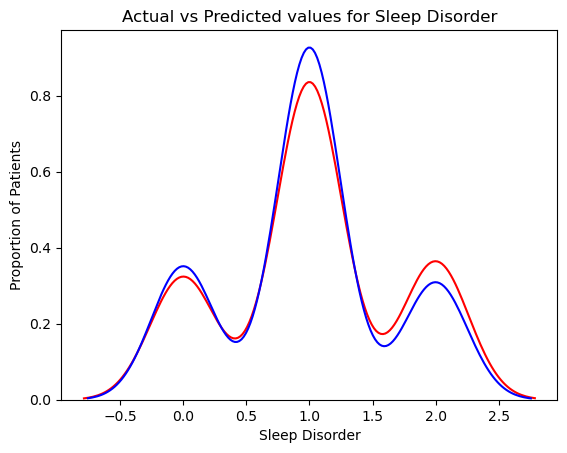

In [39]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(best_y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

## Ensembel Voting Classifier 

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# create the sub models
estimators = []
model1 = DecisionTreeClassifier(criterion="gini", random_state=10)
estimators.append(('cart', model1))
model2 = SVC(kernel="rbf", C=50, gamma=0.1)
estimators.append(('svm', model2))
model3 = KNeighborsClassifier(n_neighbors=8)
estimators.append(('knn', model3))

In [52]:
estimators

[('cart', DecisionTreeClassifier(random_state=10)),
 ('svm', SVC(C=50, gamma=0.1)),
 ('knn', KNeighborsClassifier(n_neighbors=8))]

In [55]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_scale,y_train)
y_pred=ensemble.predict(X_test_scale)
#print(Y_pred)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

Accuracy:  0.8938053097345132


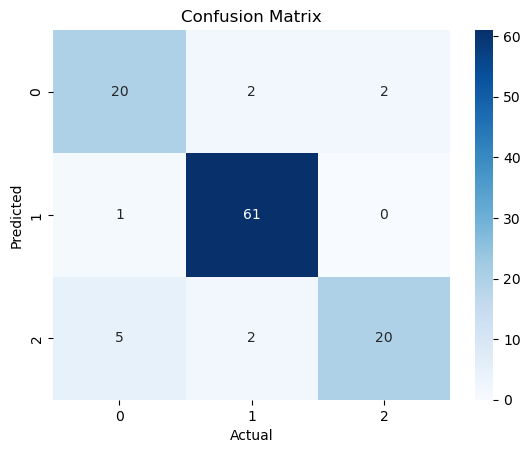

In [56]:
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Conclusion

From the exploratory data analysis, I have concluded that the sleep orders depends upon three main factors that are gender, occupation and BMI of the patient. The males have more instance of Insomia whereas femlaes have more instances of Sleep Apnea. In addition the that people with occupation such as nurses are more prone to sleep disorders. The BMI of the patient also plays a vital role in the prediction of sleep disorders. The patients who are either Obese or overweight are more prone to sleep disorders.

Coming to the classfication models, all the models performed pretty good, however the Bagging Classifier have excellent results with 90% accuracy.

### Save Model objects

In [ ]:
import joblib

In [ ]:
joblib.dump(rfc, "RFC_MODEL.pkl" )
joblib.dump(scaler, "SCALER_MODEL.pkl")

In [ ]:
model = joblib.load("RFC_MODEL.pkl")
scaler_model = joblib.load("SCALER_MODEL.pkl")

In [ ]:
## Predction for Single Data Point
sample = {"Gender": 1, 
          "Age": 30, 
          "Occupation": 1, 
          "Sleep Duration": 7.6,
          "Quality of Sleep": 7, 
          "Physical Activity Level": 75, 
          "Stress Level": 6, 
          "BMI Category": 0,
          "Heart Rate": 70, 
          "Daily Steps": 8000, 
          "systolic_bp": "120",
          "diastolic_bp": "80"}

In [ ]:
def return_prediction(model, scaler, data):
    c  = list(data.values())
    e  = np.array(c, dtype=int)
    w = scaler.transform([e])
    res = model.predict(w)
    label = ["Insomnia","None", "Sleep Apnea", ]
    return label[res[0]]

In [ ]:
return_prediction(model= model,
                  scaler= scaler_model,
                 data=sample)